
# Parking Spot Prediction Metrics Test Cases

## Overview
This notebook evaluates a set of predictions for parking spot occupancy using several performance metrics:
- **True Positives (TP)**
- **False Negatives (FN)**
- **False Positives (FP)**
- **True Negatives (TN)**

Each test case compares the predicted background (empty spots) and predicted cars with the actual real values. The metrics are calculated for each case, and the results are validated to ensure correctness.

---

## Test Cases

### 1. **Perfect Prediction**
**Description**: The predicted values perfectly match the real values.
- **Predicted Background**: 5
- **Real Background**: 5
- **Predicted Cars**: 3
- **Real Cars**: 3

**Expected Results**:
- **True Positives (TP)** = 5 (Predicted background matches real background)
- **False Negatives (FN)** = 0 (No cars are missed)
- **False Positives (FP)** = 0 (No excess background prediction)
- **True Negatives (TN)** = 3 (Cars predicted match exactly)

---

### 2. **Over-predicted Background**
**Description**: The model over-predicts the empty spots, i.e., it predicts more empty spots than actually exist.
- **Predicted Background**: 6
- **Real Background**: 4
- **Predicted Cars**: 2
- **Real Cars**: 4

**Expected Results**:
- **True Positives (TP)** = 4 (The correct background matches the real background)
- **False Negatives (FN)** = 0 (No cars were missed)
- **False Positives (FP)** = 2 (Excessive predicted background)
- **True Negatives (TN)** = 2 (Matching cars predicted as real)

---

### 3. **Under-predicted Background (Model Predicted More Cars)**
**Description**: The model under-predicts the background (empty spots) but overestimates the number of cars.
- **Predicted Background**: 3
- **Real Background**: 5
- **Predicted Cars**: 4
- **Real Cars**: 2

**Expected Results**:
- **True Positives (TP)** = 3 (Some background matches)
- **False Negatives (FN)** = 2 (Missed 2 real cars)
- **False Positives (FP)** = 2 (Excessive cars predicted)
- **True Negatives (TN)** = 2 (Some cars match)

---

### 4. **Over-predicted Cars**
**Description**: The model predicts more cars than exist.
- **Predicted Background**: 5
- **Real Background**: 5
- **Predicted Cars**: 7
- **Real Cars**: 4

**Expected Results**:
- **True Positives (TP)** = 5 (Cars predicted match real cars)
- **False Negatives (FN)** = 3 (Predicted cars exceed real cars)
- **False Positives (FP)** = 0 (No excess background prediction)
- **True Negatives (TN)** = 4 (Excess cars were predicted correctly)

---

### 5. **Under-predicted Cars**
**Description**: The model predicts fewer cars than exist.
- **Predicted Background**: 5
- **Real Background**: 5
- **Predicted Cars**: 1
- **Real Cars**: 4

**Expected Results**:
- **True Positives (TP)** = 5 (Some cars match)
- **False Negatives (FN)** = 0 (No cars missed)
- **False Positives (FP)** = 0 (No excessive background)
- **True Negatives (TN)** = 1 (Only one car was correctly predicted)

---

## Metrics Computation Logic

The metrics are calculated using the following formulas:

1. **True Positives (TP)**: The number of correctly predicted background values.
   - Formula: `TP = min(predicted_background, real_background)`
2. **False Negatives (FN)**: The difference between the predicted cars and real cars (if the predicted cars exceed real cars).
   - Formula: `FN = max(predicted_cars - real_cars, 0)`
3. **False Positives (FP)**: The absolute difference between predicted and real background values.
   - Formula: `FP = abs(predicted_background - real_background)`
4. **True Negatives (TN)**: The number of correctly predicted cars.
   - Formula: `TN = min(predicted_cars, real_cars)`

---

## Running the Tests

To run the tests and validate the metrics:
1. Ensure you have **pandas** installed in your Python environment.
2. Run the script, and it will output the validation results for each test case.


---

This set of test cases ensures that various prediction scenarios for parking spot occupancy are covered. The test cases involve scenarios where the background or the cars are either over-predicted or under-predicted, and the validation checks if the metrics are computed correctly.

---

In [2]:
import pandas as pd

def compute_metrics(df):
    df['TP'] = df.apply(lambda row: min(row['predicted_background'], row['real_background']), axis=1)
    df['FN'] = df.apply(lambda row: max(row['predicted_cars'] - row['real_cars'], 0), axis=1)
    df['FP'] = df.apply(lambda row: abs(row['predicted_background'] - row['real_background']), axis=1)
    df['TN'] = df.apply(lambda row: min(row['predicted_cars'], row['real_cars']), axis=1)
    return df

# Test cases
data = [
    # Perfect Prediction
    {'predicted_background': 5, 'real_background': 5, 'predicted_cars': 3, 'real_cars': 3, 'expected_TP': 5, 'expected_FN': 0, 'expected_FP': 0, 'expected_TN': 3},
    # Over-predicted Background
    {'predicted_background': 6, 'real_background': 4, 'predicted_cars': 2, 'real_cars': 4, 'expected_TP': 4, 'expected_FN': 0, 'expected_FP': 2, 'expected_TN': 2},
    # Under-predicted Background (Model Predicted More Cars)
    {'predicted_background': 3, 'real_background': 5, 'predicted_cars': 4, 'real_cars': 2, 'expected_TP': 3, 'expected_FN': 2, 'expected_FP': 2, 'expected_TN': 2},
#     # Over-predicted Cars
    {'predicted_background': 5, 'real_background': 5, 'predicted_cars': 7, 'real_cars': 4, 'expected_TP': 5, 'expected_FN': 3, 'expected_FP': 0, 'expected_TN': 4},

#     # Under-predicted Cars
    {'predicted_background': 5, 'real_background': 5, 'predicted_cars': 1, 'real_cars': 4, 'expected_TP': 5, 'expected_FN': 0, 'expected_FP': 0, 'expected_TN': 1},
    #

]
df = pd.DataFrame(data)
df = compute_metrics(df)

# Validate the results
def validate_results(df):
    for index, row in df.iterrows():
        assert row['TP'] == row['expected_TP'], f"Mismatch in TP at index {index}"
        assert row['FN'] == row['expected_FN'], f"Mismatch in FN at index {index}"
        assert row['FP'] == row['expected_FP'], f"Mismatch in FP at index {index}"
        assert row['TN'] == row['expected_TN'], f"Mismatch in TN at index {index}"
    print("All test cases passed!")

validate_results(df)
print(df[['predicted_background', 'real_background', 'predicted_cars', 'real_cars', 'TP', 'FN', 'FP', 'TN']])

All test cases passed!
   predicted_background  real_background  predicted_cars  real_cars  TP  FN  \
0                     5                5               3          3   5   0   
1                     6                4               2          4   4   0   
2                     3                5               4          2   3   2   
3                     5                5               7          4   5   3   
4                     5                5               1          4   5   0   

   FP  TN  
0   0   3  
1   2   2  
2   2   2  
3   0   4  
4   0   1  


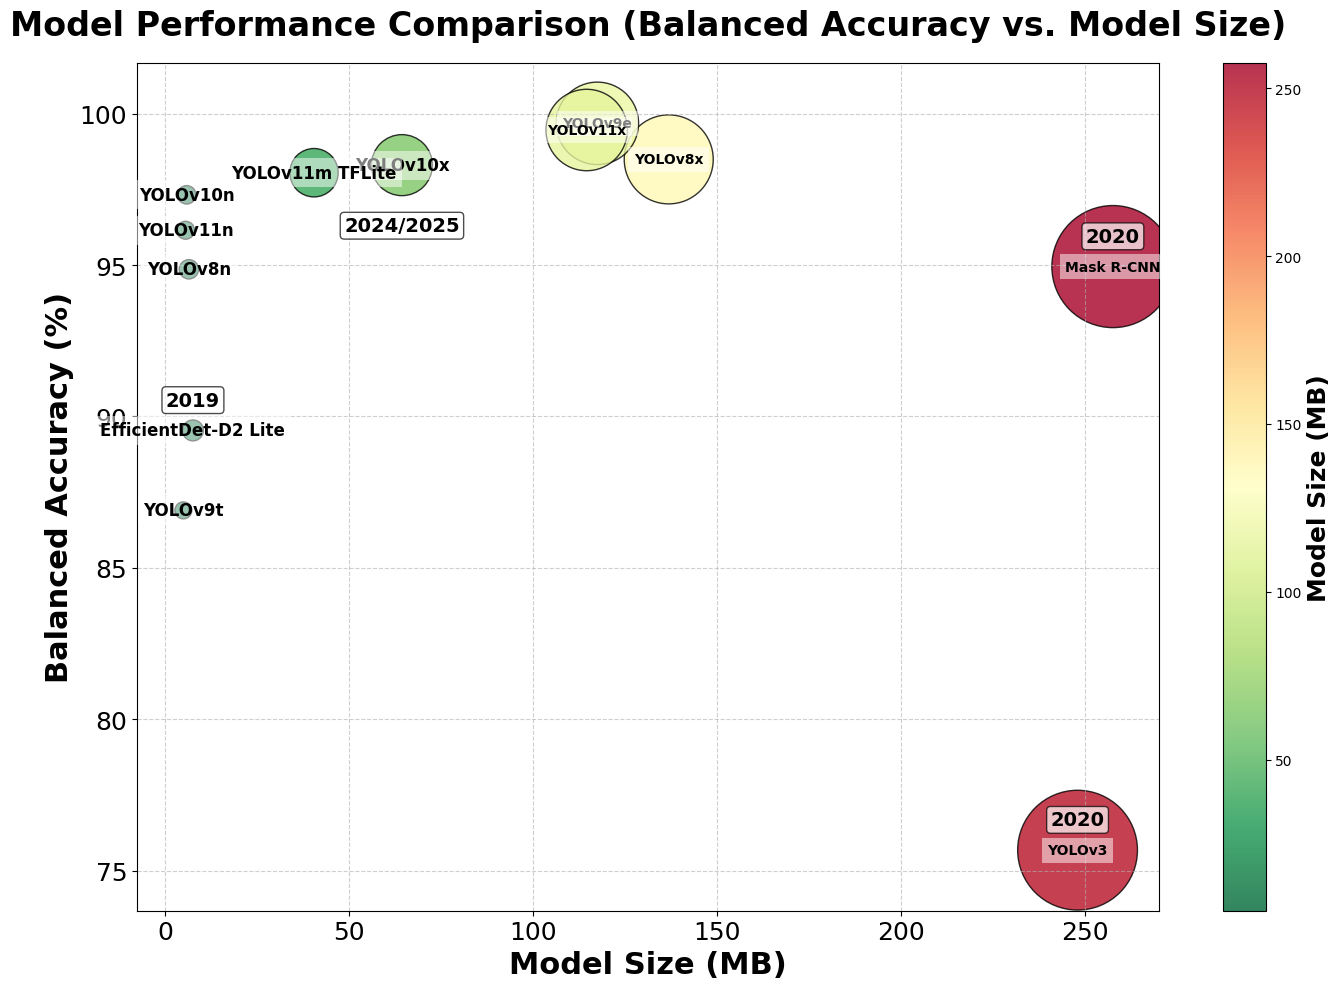

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# 0.891 ± 0.12
# Data stored as a dictionary of models for easier editing
data = {
    "Mask R-CNN": {"balanced_accuracy": 0.9495, "inference_time": None, "inference_time_std": None, "model_size": 257.6},
    "EfficientDet-D2 Lite": {"balanced_accuracy": 0.8954, "inference_time": 1, "inference_time_std": 0.12, "model_size": 7.6},
    "YOLOv3": {"balanced_accuracy": 0.7568, "inference_time": 10, "inference_time_std": 0.23, "model_size": 248},
    "YOLOv8x": {"balanced_accuracy": 0.9849, "inference_time": 28, "inference_time_std": 0.7, "model_size": 136.9},
    "YOLOv8n": {"balanced_accuracy": 0.9486, "inference_time": 2, "inference_time_std": 0.06, "model_size": 6.5},
    "YOLOv9e": {"balanced_accuracy": 0.9968, "inference_time": 92, "inference_time_std": 9.3, "model_size": 117.5},
    "YOLOv9t": {"balanced_accuracy": 0.8690, "inference_time": 2, "inference_time_std": 0.02, "model_size": 5},
    "YOLOv10x": {"balanced_accuracy": 0.9830, "inference_time": 24, "inference_time_std": 0.2, "model_size": 64.4},
    "YOLOv10n": {"balanced_accuracy": 0.9732, "inference_time": 2, "inference_time_std": 0.03, "model_size": 5.9},
    "YOLOv11x": {"balanced_accuracy": 0.9946, "inference_time": 46, "inference_time_std": 7.4, "model_size": 114.6},
    "YOLOv11n": {"balanced_accuracy": 0.9615, "inference_time": 2, "inference_time_std": 0.02, "model_size": 5.6},
    "YOLOv11m TFLite": {"balanced_accuracy": 0.9805, "inference_time": 12, "inference_time_std": 1.1, "model_size": 40.5},
}

import matplotlib.pyplot as plt

# Extract data for plotting
models = list(data.keys())
balanced_accuracy = [data[model]["balanced_accuracy"] for model in models]
model_size = [data[model]["model_size"] for model in models]

# Convert balanced accuracy to percentage
balanced_accuracy_percent = [acc * 100 for acc in balanced_accuracy]

# Normalize bubble size for better visibility (larger bubbles)
bubble_size = [s * 30 for s in model_size]  # Increased multiplier for larger bubbles

# Create the plot
plt.figure(figsize=(14, 10))  # Adjusted figure size for better fit in PDF

# Create scatter plot with color mapping for model size (using RdYlGn colormap)
sc = plt.scatter(
    model_size,
    balanced_accuracy_percent,
    s=bubble_size,
    c=model_size,
    alpha=0.8,
    edgecolors="black",
    cmap="RdYlGn_r",  # Red-Yellow-Green colormap (reversed for better contrast)
)

# Add model names inside the bubbles
for i, model in enumerate(models):
    # Adjust text size dynamically based on bubble size
    text_size = 12 if bubble_size[i] < 2000 else 10  # Adjusted text size for better readability
    plt.text(
        model_size[i],
        balanced_accuracy_percent[i],
        model,
        fontsize=text_size,
        fontweight="bold",  # Bold text
        ha="center",  # Center text horizontally
        va="center",  # Center text vertically
        color="black",  # Text color
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'),  # Optional: Add a background to the text
    )

# Add this right after the loop that adds model names inside bubbles (before titles/labels)

# Add year annotations
year_annotations = {
    "EfficientDet-D2 Lite": "2019",
    "YOLOv3": "2020",
    "Mask R-CNN": "2020",
    # "YOLOv9e": "2024",
    "YOLOv10x": "2024/2025",
    # "YOLOv11m TFLite": "2025"
}

# Adjust positions for year annotations (dx, dy from bubble center)
year_positions = {
    "EfficientDet-D2 Lite": (0, +1),
    "YOLOv3": (0, +1),
    "Mask R-CNN": (0, +1),
    # "YOLOv9e": (0, 5),
    "YOLOv10x": (0, -2),
    # "YOLOv11m TFLite": (0, 5)
}

for model, year in year_annotations.items():
    if model in models:
        idx = models.index(model)
        dx, dy = year_positions.get(model, (0, 0))
        plt.text(
            model_size[idx] + dx,
            balanced_accuracy_percent[idx] + dy,
            year,
            fontsize=14,
            fontweight='bold',
            ha='center',
            va='center',
            color='black',
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2')
        )

# Then continue with your existing code for titles/labels...


# Titles and labels
plt.xlabel("Model Size (MB)", fontsize=22, fontweight='bold')  # Adjusted font size
plt.ylabel("Balanced Accuracy (%)", fontsize=22, fontweight='bold')  # Adjusted font size
plt.title("Model Performance Comparison (Balanced Accuracy vs. Model Size)", fontsize=24, fontweight='bold', pad=20)  # Adjusted font size and padding

plt.xticks(fontsize=18)  # Adjusted tick labels
plt.yticks(fontsize=18)  # Adjusted tick labels

# Add a colorbar to represent model size
cbar = plt.colorbar(sc)
cbar.set_label('Model Size (MB)', fontsize=18, fontweight='bold')  # Adjusted font size

# Adjust y-axis limits to fit the data
plt.ylim(min(balanced_accuracy_percent) - 2, max(balanced_accuracy_percent) + 2)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.tight_layout()
plt.savefig('model_performance_comparison.pdf', format='pdf', bbox_inches='tight')  # Save as PDF for LaTeX
plt.savefig('model_performance_comparison.png', format='png', bbox_inches='tight')
plt.show()